# Support Vector Machines

(Based on an example from VanderPlas, *Python Data Science Handbook*: https://jakevdp.github.io/PythonDataScienceHandbook/)

In [1]:
import numpy as np

from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns; sns.set()

#### Some basic plotting functions

In [12]:
def plot_sets(Xs, ys, axes=None):
    """Plots a 2-dimensional (X), 2-class (y) data-set."""
    axes = axes or plt
        
    X0, X1 = Xs[ys==0], Xs[ys!=0]
    axes.scatter(X0[:, 0], X0[:, 1], c='blue', s=50)
    axes.scatter(X1[:, 0], X1[:, 1], c='red', s=50, marker='D')

def plot_sets_3d(Xs, ys):
    """Plots a 3-dimensional (X), 2-class (y) data-set."""
    axes = plt.axes(projection='3d')
        
    X0, X1 = Xs[ys==0], Xs[ys!=0]
    axes.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='blue', s=50)
    axes.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='red', s=50, marker='D')

#### More complex plotting for SVMs

In [13]:
def plot_svc_decision_function(model, axes=None, plot_support=True):
    """Plot the decision function for a 2D SVC (Support Vector Classifier)."""
    axes = axes or plt.gca()
    xlim = axes.get_xlim()
    ylim = axes.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    axes.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        axes.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=2, c='black', marker='x')
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    
def plot_svm(N=10, axes=None):
    """Generates some 2-dimensional data-blobs of size 200.
       Fits a SVC to the first N elements of that data, and shows 
       the resulting model boundaries over the data itself."""
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=10)
    model.fit(X, y)
    
    axes = axes or plt.gca()
    plot_sets(X, y, axes)
    
    axes.set_xlim(-1, 4)
    axes.set_ylim(-1, 6)
    plot_svc_decision_function(model, axes)

## Support Vector Machines

Consider a case with two well-separated sets of points:

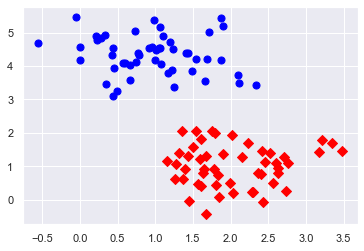

In [15]:
Xs, ys = make_blobs(centers=2, random_state=0, cluster_std=0.6)
plot_sets(Xs,ys)

In [16]:
model = SVC(kernel='linear', C=100)
model.fit(Xs,ys)

SVC(C=100, kernel='linear')

In [17]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

### Beyond linear boundaries: Kernel SVM

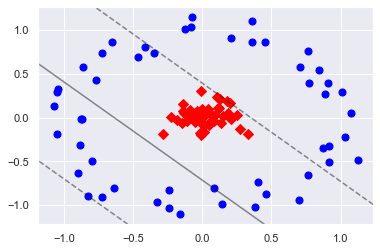

In [7]:
Xs, ys = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(Xs, ys)

plot_sets(Xs, ys)
plot_svc_decision_function(clf, plot_support=False);

### Softening Margins

In [ ]:
Xs, ys = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plot_sets(Xs, ys)

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin:

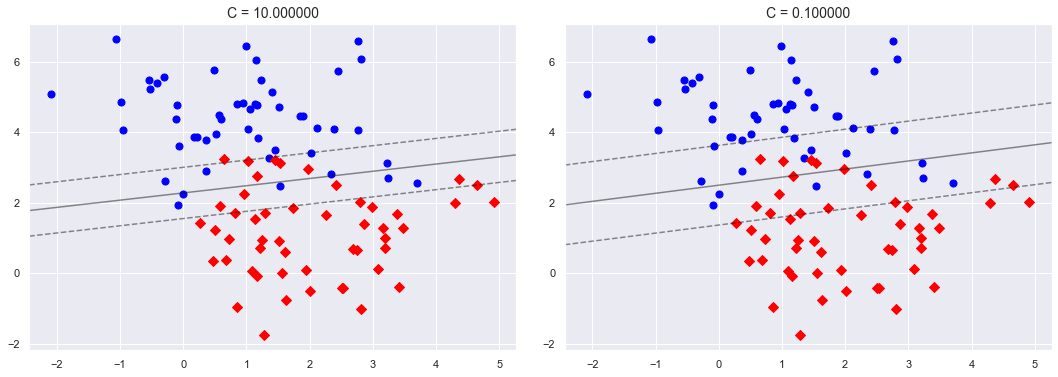

In [18]:
Xs, ys = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Play with the two values (10.0, 0.1) to experiment with 
# harder margins (higher values) or softer (lower).
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(Xs, ys)
    plot_sets(Xs, ys, axi)
    
    # If you want to see the support vectors, toggle plot_support.
    plot_svc_decision_function(model, axi, plot_support=False)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:f}'.format(C), size=14)